In [1]:
import numpy as np
from matplotlib import pyplot as plt, animation as ani

In [2]:
pop_size = 100
pop_dimension = 1
max_generations = 100
limits = [-100,100]
population = limits[0] + np.random.rand(pop_size,pop_dimension) * (limits[1]-limits[0])

In [3]:
def F(X):
    return np.sum(X**2,axis=1)

def rec_mean(a,b):
    return (a + b)/2

recombination_types = {
    "mean":rec_mean
}

In [4]:
def recombination(rec_type = 'mean'):
    rec = recombination_types[rec_type]
    new_population = np.zeros([pop_size,pop_dimension])
    for i in range(pop_size):
        r = np.random.randint(0,pop_size)
        new_population[i,:] = rec(population[i,:], population[r,:])
    return new_population

def selection(new_population):
    global population
    temp_pop = np.concatenate((population, new_population), axis=0)
    objective = F(temp_pop)
    index = np.argsort(objective)
    temp_pop = temp_pop[index]
    population = temp_pop[:pop_size,:]

In [5]:
selection(recombination("mean"))

In [6]:
from time import sleep

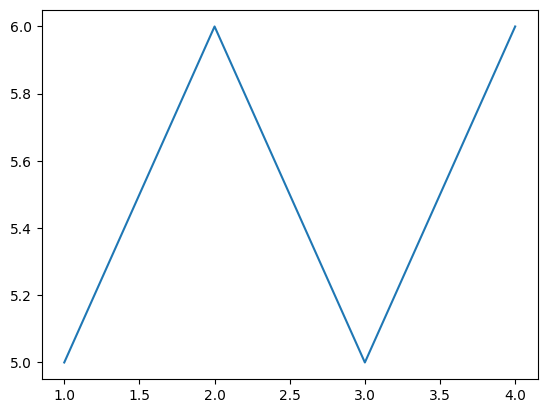

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([1,2,3,4],[5,6,5,6])
plt.show()
sleep(1)
ax.plot([1,2,3,5],[5,6,5,6])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_660\3231933048.py:56: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = ani.FuncAnimation(fig, animate, interval=400)


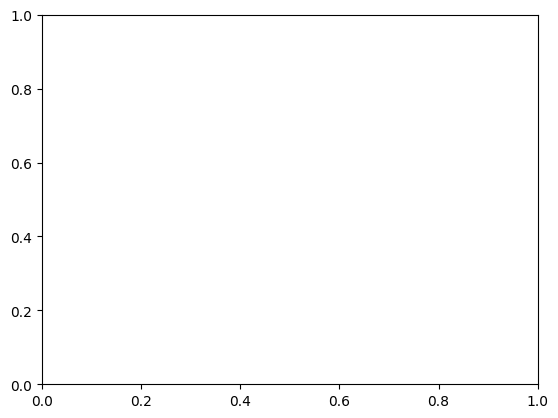

In [8]:
import numpy as np
from matplotlib import pyplot as plt, animation as ani
pop_size = 100
pop_dimension = 1
max_generations = 100
limits = [-100,100]
population = limits[0] + np.random.rand(pop_size,pop_dimension) * (limits[1]-limits[0])
def paraboloid(X):
    return np.sum(X**2,axis=1)
def rastrigin(X):
    dim = X.shape[1]
    return 10*dim + np.sum(X**2-10*np.cos(2*np.pi*X),axis=1)

funcs = {
    "paraboloid":paraboloid,
    "rastrigin":rastrigin
}
func = "rastrigin"

F = funcs[func]

def rec_mean(a,b):
    return (a + b)/2

recombination_types = {
    "mean":rec_mean
}

def recombination(rec_type = 'mean'):
    rec = recombination_types[rec_type]
    new_population = np.zeros([pop_size,pop_dimension])
    for i in range(pop_size):
        r = np.random.randint(0,pop_size)
        new_population[i,:] = rec(population[i,:], population[r,:])
    return new_population

def selection(new_population):
    global population
    temp_pop = np.concatenate((population, new_population), axis=0)
    objective = F(temp_pop)
    index = np.argsort(objective)
    temp_pop = temp_pop[index]
    population = temp_pop[:pop_size,:]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.clear()
    ax.set_ylim([0,100])
    ax.set_xlim([-5,5])
    ax.plot(population,F(population),'.')
    selection(recombination("mean"))

    
animation = ani.FuncAnimation(fig, animate, interval=400) 
plt.show()